<a href="https://colab.research.google.com/github/MaksonViini/Analisando_dados/blob/master/Algar_dataset_maratona.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#***Inicio***

In [7]:
# Importacao das bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [46]:
# Importacao do pandas data frame
df = pd.read_csv('https://raw.githubusercontent.com/maratonadev-br/desafio-4-2020/master/data/train_dataset_algartech.csv')

###**Análise exploratória**

In [5]:
df.head()

,Idade,Local de trabalho,Pontuação teste,Departmento,Distancia casa-trabalho,Educacao,Area,Possui carro,Subordinado,Satisfação com o ambiente no emprego atual,Genero,Horas voluntariado,Envolvimento com trabalho,Posicao,Cargo,Satisfação com emprego,Estado civil,Renda,Bonus de performance,Quantidade de empresas que trabalho,Maior de idade,Necessita de hora extra,Aumento de salario%,Performance na entrevista,Satisfação com a relação,Horas de trabalho padrão,Beneficios,Anos de experiencia,Horas de treinamento ultimo ano,Estilo de vida,Anos na última empresa,Anos na posição atual,Anos desde última promoção,Anos com a mesma gerência,Contratar
0,49,Cliente,279,Engenharia,8,Médio completo,Ciências das natureza,1,2,3,M,61,2,2,Engenheiro,2,Casado,5130,24907,1,1,Não,23,4,4,80,1,10,3,3,10,7,1,7,Não
1,33,Misto,1392,Engenharia,3,Superior incompleto - cursando,Ciências das natureza,1,5,4,F,56,3,1,Engenheiro,3,Casado,2909,23159,1,1,Sim,11,3,3,80,0,8,3,3,8,7,3,0,Não
2,27,Cliente,591,Engenharia,2,Médio completo,Medicina,1,7,1,M,40,3,1,Tecnico,2,Casado,3468,16632,9,1,Não,12,3,4,80,1,6,3,3,2,2,2,2,Não
3,32,Misto,1005,Engenharia,2,Superior incompleto,Ciências das natureza,1,8,4,M,79,3,1,Tecnico,4,Solteiro,3068,11864,0,1,Não,13,3,3,80,0,8,2,2,7,7,3,6,Não
4,59,Misto,1324,Engenharia,3,Superior completo,Medicina,1,10,3,F,81,4,1,Tecnico,1,Casado,2670,9964,4,1,Sim,20,4,1,80,3,12,3,2,1,0,0,0,Não


In [6]:
# Verificando o tamanho do dataset
df.shape

(1370, 35)

In [10]:
df.duplicated().sum() # Verificando dados duplicados

0

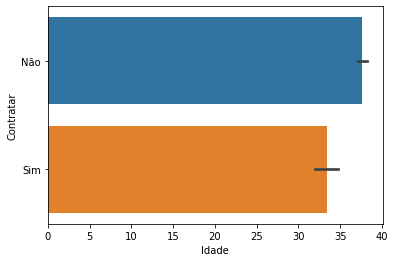

In [12]:
sns.barplot(df['Idade'],df['Contratar'])

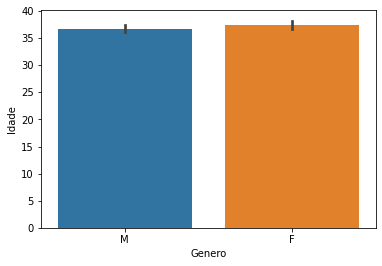

In [26]:
sns.barplot(df['Genero'], df['Idade'])

In [31]:
# Media de renda
np.mean(df['Renda'])

6572.754744525548

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1370 entries, 0 to 1369
Data columns (total 35 columns):
 #   Column                                      Non-Null Count  Dtype 
---  ------                                      --------------  ----- 
 0   Idade                                       1370 non-null   int64 
 1   Local de trabalho                           1370 non-null   object
 2   Pontuação teste                             1370 non-null   int64 
 3   Departmento                                 1370 non-null   object
 4   Distancia casa-trabalho                     1370 non-null   int64 
 5   Educacao                                    1370 non-null   object
 6   Area                                        1370 non-null   object
 7   Possui carro                                1370 non-null   int64 
 8   Subordinado                                 1370 non-null   int64 
 9   Satisfação com o ambiente no emprego atual  1370 non-null   int64 
 10  Genero                  

In [38]:
df.nunique()

Idade                                           43
Local de trabalho                                3
Pontuação teste                                853
Departmento                                      3
Distancia casa-trabalho                         29
Educacao                                         5
Area                                             6
Possui carro                                     1
Subordinado                                   1370
Satisfação com o ambiente no emprego atual       4
Genero                                           2
Horas voluntariado                              71
Envolvimento com trabalho                        4
Posicao                                          5
Cargo                                            9
Satisfação com emprego                           4
Estado civil                                     3
Renda                                         1269
Bonus de performance                          1329
Quantidade de empresas que trab

###**Análise Descritiva**

In [33]:
df.describe()

,Idade,Pontuação teste,Distancia casa-trabalho,Possui carro,Subordinado,Satisfação com o ambiente no emprego atual,Horas voluntariado,Envolvimento com trabalho,Posicao,Satisfação com emprego,Renda,Bonus de performance,Quantidade de empresas que trabalho,Maior de idade,Aumento de salario%,Performance na entrevista,Satisfação com a relação,Horas de trabalho padrão,Beneficios,Anos de experiencia,Horas de treinamento ultimo ano,Estilo de vida,Anos na última empresa,Anos na posição atual,Anos desde última promoção,Anos com a mesma gerência
count,1370.000000,1370.000000,1370.000000,1370.0,1370.000000,1370.000000,1370.000000,1370.000000,1370.000000,1370.000000,1370.000000,1370.000000,1370.000000,1370.0,1370.000000,1370.000000,1370.000000,1370.0,1370.000000,1370.000000,1370.000000,1370.000000,1370.000000,1370.000000,1370.000000,1370.000000
mean,37.030657,807.249635,9.105109,1.0,1012.276642,2.729927,65.807299,2.745985,2.081752,2.723358,6572.754745,14296.439416,2.703650,1.0,15.174453,3.150365,2.720438,80.0,0.804380,11.357664,2.800730,2.769343,7.031387,4.244526,2.206569,4.141606
std,9.196528,404.400662,7.992457,0.0,569.946647,1.091863,20.389902,0.706643,1.113974,1.107829,4755.773452,7122.797449,2.499333,0.0,3.629208,0.357559,1.079704,0.0,0.851919,7.849234,1.282745,0.704319,6.127907,3.617897,3.220930,3.578049
min,18.000000,102.000000,1.000000,1.0,2.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,1.0,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.250000,2.000000,1.0,516.250000,2.000000,48.000000,2.000000,1.000000,2.000000,2932.250000,8009.750000,1.000000,1.0,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,806.000000,7.000000,1.0,1014.500000,3.000000,66.000000,3.000000,2.000000,3.000000,4955.000000,14225.500000,2.000000,1.0,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1168.750000,14.000000,1.0,1512.000000,4.000000,83.000000,3.000000,3.000000,4.000000,8437.500000,20456.250000,4.000000,1.0,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,10.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,1.0,2055.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,1.0,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,37.000000,18.000000,15.000000,17.000000


In [34]:
df.tail()

,Idade,Local de trabalho,Pontuação teste,Departmento,Distancia casa-trabalho,Educacao,Area,Possui carro,Subordinado,Satisfação com o ambiente no emprego atual,Genero,Horas voluntariado,Envolvimento com trabalho,Posicao,Cargo,Satisfação com emprego,Estado civil,Renda,Bonus de performance,Quantidade de empresas que trabalho,Maior de idade,Necessita de hora extra,Aumento de salario%,Performance na entrevista,Satisfação com a relação,Horas de trabalho padrão,Beneficios,Anos de experiencia,Horas de treinamento ultimo ano,Estilo de vida,Anos na última empresa,Anos na posição atual,Anos desde última promoção,Anos com a mesma gerência,Contratar
1365,23,Misto,638,Vendas,9,Superior completo,Marketing,1,2023,4,M,33,3,1,Vendedor junior,1,Casado,1790,26956,1,1,Não,19,3,1,80,1,1,3,2,1,0,1,0,Sim
1366,29,Misto,1092,Engenharia,1,Superior incompleto - cursando,Medicina,1,2027,1,M,36,3,1,Engenheiro,4,Casado,4787,26124,9,1,Sim,14,3,2,80,3,4,3,4,2,2,2,2,Sim
1367,56,Cliente,310,Engenharia,7,Superior incompleto,Faculdade Técnica,1,2032,4,M,72,3,1,Tecnico,3,Casado,2339,3666,8,1,Não,11,3,4,80,1,14,4,1,10,9,9,8,Sim
1368,50,Misto,878,Vendas,1,Superior incompleto - cursando,Ciências das natureza,1,2044,2,M,94,3,2,Vendedo senior,3,Divorciado,6728,14255,7,1,Não,12,3,4,80,2,12,3,3,6,3,0,1,Sim
1369,50,Cliente,410,Vendas,28,Superior completo,Marketing,1,2055,4,M,39,2,3,Vendedo senior,1,Divorciado,10854,16586,4,1,Sim,13,3,2,80,1,20,3,3,3,2,2,0,Sim


##**Pré-processamento**


In [47]:
df = df.drop(columns=['Idade', 'Estado civil', 'Renda', 'Maior de idade', 'Genero'])

In [48]:
df.tail()

,Local de trabalho,Pontuação teste,Departmento,Distancia casa-trabalho,Educacao,Area,Possui carro,Subordinado,Satisfação com o ambiente no emprego atual,Horas voluntariado,Envolvimento com trabalho,Posicao,Cargo,Satisfação com emprego,Bonus de performance,Quantidade de empresas que trabalho,Necessita de hora extra,Aumento de salario%,Performance na entrevista,Satisfação com a relação,Horas de trabalho padrão,Beneficios,Anos de experiencia,Horas de treinamento ultimo ano,Estilo de vida,Anos na última empresa,Anos na posição atual,Anos desde última promoção,Anos com a mesma gerência,Contratar
1365,Misto,638,Vendas,9,Superior completo,Marketing,1,2023,4,33,3,1,Vendedor junior,1,26956,1,Não,19,3,1,80,1,1,3,2,1,0,1,0,Sim
1366,Misto,1092,Engenharia,1,Superior incompleto - cursando,Medicina,1,2027,1,36,3,1,Engenheiro,4,26124,9,Sim,14,3,2,80,3,4,3,4,2,2,2,2,Sim
1367,Cliente,310,Engenharia,7,Superior incompleto,Faculdade Técnica,1,2032,4,72,3,1,Tecnico,3,3666,8,Não,11,3,4,80,1,14,4,1,10,9,9,8,Sim
1368,Misto,878,Vendas,1,Superior incompleto - cursando,Ciências das natureza,1,2044,2,94,3,2,Vendedo senior,3,14255,7,Não,12,3,4,80,2,12,3,3,6,3,0,1,Sim
1369,Cliente,410,Vendas,28,Superior completo,Marketing,1,2055,4,39,2,3,Vendedo senior,1,16586,4,Sim,13,3,2,80,1,20,3,3,3,2,2,0,Sim


In [49]:
df.columns

Index(['Local de trabalho', 'Pontuação teste', 'Departmento',
       'Distancia casa-trabalho', 'Educacao', 'Area', 'Possui carro',
       'Subordinado', 'Satisfação com o ambiente no emprego atual',
       'Horas voluntariado', 'Envolvimento com trabalho', 'Posicao', 'Cargo',
       'Satisfação com emprego', 'Bonus de performance',
       'Quantidade de empresas que trabalho', 'Necessita de hora extra',
       'Aumento de salario%', 'Performance na entrevista',
       'Satisfação com a relação', 'Horas de trabalho padrão', 'Beneficios',
       'Anos de experiencia', 'Horas de treinamento ultimo ano',
       'Estilo de vida', 'Anos na última empresa', 'Anos na posição atual',
       'Anos desde última promoção', 'Anos com a mesma gerência', 'Contratar'],
      dtype='object')

In [ ]:
df.isnull().sum()

###**Criando o modelo**

In [60]:
features = [
        'Local de trabalho', 'Pontuação teste', 'Departmento',
       'Distancia casa-trabalho', 'Educacao', 'Area', 'Possui carro',
       'Subordinado', 'Satisfação com o ambiente no emprego atual',
       'Horas voluntariado', 'Envolvimento com trabalho', 'Posicao', 'Cargo',
       'Satisfação com emprego', 'Bonus de performance',
       'Quantidade de empresas que trabalho', 'Necessita de hora extra',
       'Aumento de salario%', 'Performance na entrevista',
       'Satisfação com a relação', 'Horas de trabalho padrão', 'Beneficios',
       'Anos de experiencia', 'Horas de treinamento ultimo ano',
       'Estilo de vida', 'Anos na última empresa', 'Anos na posição atual',
       'Anos desde última promoção', 'Anos com a mesma gerência'
]
target = df['Contratar'] # Coluna alvo, TARGET

In [ ]:
from sklearn.model_selection import train_test_split

#X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=42, stratify=target)